In [1]:
import pandas as pd

from utils import load_test_data, visualize_test_region
from baseline import RandomRegionBaseline
from evaluate import Evaluator

In [2]:
all_test_items = load_test_data()

Seeding all randomness with seed=2024
Donor_id: MsBrainAgingSpatialDonor_1
Slice_id: 0


In [3]:
for i, test_item in enumerate(all_test_items):
    print(f"Test Area {i+1}:")
    print(f"  Min X: {test_item.test_area.hole_min_x}")
    print(f"  Max X: {test_item.test_area.hole_max_x}")
    print(f"  Min Y: {test_item.test_area.hole_min_y}")
    print(f"  Max Y: {test_item.test_area.hole_max_y}")
    print(f"  Dominant Tissue: {test_item.test_area.dominant_tissue}")
    print(f"  Number of cells in ground truth: {len(test_item.ground_truth.hole_cells)}")
    print(f"  Number of cells in adata after masking: {test_item.adata.shape[0]}")
    print(f"  Gene expression shape: {test_item.ground_truth.gene_expression.shape}")
    
    print("  Tissue Percentages in Ground Truth:")
    for tissue, percentage in test_item.ground_truth.tissue_percentages.items():
        print(f"    {tissue}: {percentage:.2%}")
        
    break
        

Test Area 1:
  Min X: -4386.3131320199245
  Max X: -4186.3131320199245
  Min Y: 1787.984928815533
  Max Y: 1975.8793868213893
  Dominant Tissue: striatum
  Number of cells in ground truth: 72
  Number of cells in adata after masking: 20930
  Gene expression shape: (72, 374)
  Tissue Percentages in Ground Truth:
    striatum: 100.00%
    corpus callosum: 0.00%
    pia mater: 0.00%
    olfactory region: 0.00%
    brain ventricle: 0.00%
    cortical layer V: 0.00%
    cortical layer VI: 0.00%
    cortical layer II/III: 0.00%


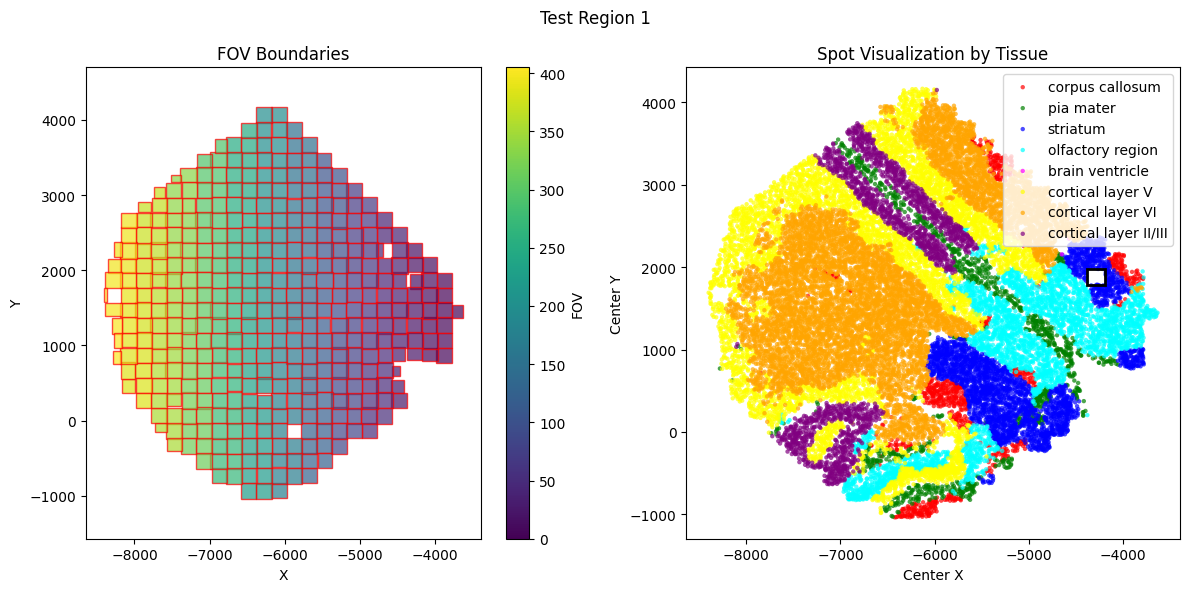

In [4]:
visualize_test_region(pd.DataFrame(test_item.adata.obs), test_item.test_area, title=f'Test Region {i+1}')

In [5]:
# Apply RandomRegionBaseline
baseline = RandomRegionBaseline(test_item.adata, test_item.test_area)
pred_coords, pred_gene_expressions = baseline.fill_region()

In [6]:
# Evaluate predictions
true_coords = test_item.ground_truth.hole_cells[['center_x', 'center_y']].values
true_gene_expressions = test_item.ground_truth.gene_expression

mse, f1, cosine_sim = Evaluator.evaluate_expression(true_coords, true_gene_expressions, pred_coords, pred_gene_expressions)
chamfer_dist = Evaluator.chamfer_distance(true_coords, pred_coords)
emd = Evaluator.calculate_emd(true_coords, pred_coords)

print(f"  Evaluation Metrics for Random Region Baseline:")
print(f"    MSE: {mse}")
print(f"    F1 Score: {f1}")
print(f"    Cosine Similarity: {cosine_sim}")
print(f"    Chamfer Distance: {chamfer_dist}")
print(f"    EMD: {emd}")

  Evaluation Metrics for Random Region Baseline:
    MSE: 2.2110133171081543
    F1 Score: 0.7782482273121462
    Cosine Similarity: -0.015239310450851917
    Chamfer Distance: 25.889433249987633
    EMD: 10.34096321323694


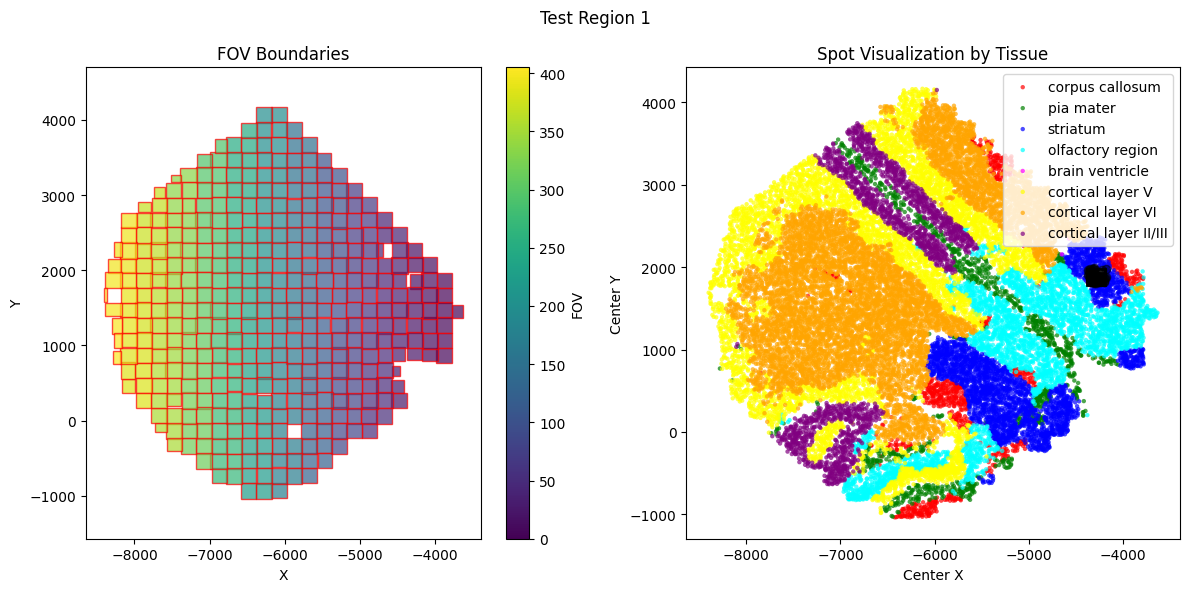

In [7]:
# Visualize test region with generated coordinates
visualize_test_region(pd.DataFrame(test_item.adata.obs), test_item.test_area, title=f'Test Region {i+1}', new_coords=pred_coords)